In [1]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import forward.backend

In [2]:
%matplotlib inline
plt.style.use("ggplot")

After running a Forward analysis using the command-line interface, a directory with the experiment's name be created. This directory contains all the necessary information to explore the results. To make data exploration easier, we have build an API (the backend) that can be used to write custom analysis scripts.

The web based report (available by starting a server using the command line interface) also uses this API internally.

In [3]:
# If you try to run this notebook locally, you will need to have
# a Forward experiment folder available. Follow the Quick Start
# section of the documentation to get more information on how to do that.
backend = forward.backend.Backend("skat_test_experiment")  # This is a simple SKAT analysis.

In [4]:
# Let's explore this object.
dir(backend)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fit_line',
 'config',
 'correlation_matrix',
 'engine',
 'get_bonferonni',
 'get_configuration',
 'get_outcome_vector',
 'get_related_phenotypes_exclusions',
 'get_results',
 'get_task_info',
 'get_tasks',
 'get_variable_corrplot',
 'get_variable_histogram',
 'get_variable_normal_qqplot',
 'get_variables',
 'get_variants',
 'hdf5_file',
 'info',
 'p_value_qq_plot',
 'session',
 'task_info']

In [5]:
# Let's browse the help for some interesting functions.
help(backend.get_tasks)
print()
help(backend.get_results)

Help on method get_tasks in module forward.backend:

get_tasks(self) method of forward.backend.Backend instance
    Get a list of task names that were conducted in this experiment.


Help on method get_results in module forward.backend:

get_results(self, task, filters=[], order_by=None, ascending=True) method of forward.backend.Backend instance
    Get the results for a specific analysis.



In [6]:
# Using this function, we can see that this experiment included
# a single task and that it was a SKAT analysis.
tasks = backend.get_tasks()
print(tasks)
task = tasks[0]

[u'task0_SKATTest']


In [7]:
# We can get the results for this task using the backend.
results = pd.DataFrame(backend.get_results(task))
results = results[["entity_name", "phenotype", "significance", "test_statistic"]]
results.sort(columns="significance", ascending=True, inplace=True)
results

,entity_name,phenotype,significance,test_statistic
33,set1,MaladVascPerif,0.002669,121009.349050
38,set1,HeartTrans,0.005063,6038.721553
14,set1,Syncope,0.012831,151303.645523
21,set1,BlocAV,0.019645,37282.498294
39,set1,ChirCardPeriph,0.031430,21036.002662
30,set1,gastro_any,0.043056,33458.272262
4,set1,PCI,0.054281,77139.134292
48,set1,CancerSang,0.097037,26858.704339
28,set1,polypes_cancer,0.108890,7027.697939
16,set1,Arythmie,0.121557,69860.383714


(0, 3)

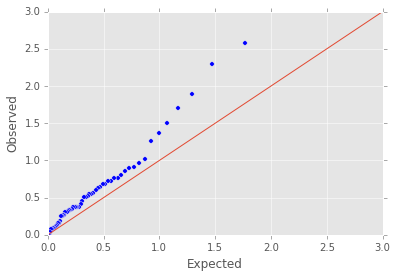

In [8]:
# So we can look or play with the data using this.
# Let's create a QQ plot of the assocition p-values for this task.
observed = -1 * np.log10(results["significance"].values)
n = observed.shape[0]
expected = -1 * np.log10(np.arange(1, n + 1) / n)
plt.scatter(expected, observed)
plt.xlabel("Expected")
plt.ylabel("Observed")

plt.plot([0, 3], [0, 3])
plt.ylim([0, 3])
plt.xlim([0, 3])

This simple example shows how you can access the experiment data from Python by using the backend. This can be a useful way to customize the analysis while keeping the benefits of using Forward to manage and run the experiments.